In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('processed.hungarian.csv')

data.columns = ["Age", "Sex", "ChestPType", "Blood_Pressure", "Cholesterol", "BloodSugar", "electrocardio", "MaxHeartRate", "Exang", "Oldpeak", "Slope", "NumMajorVessles","Thal", "Heart_Disease_Risk"]

data.replace('?', np.nan, inplace=True)


In [16]:

# Chat gpt replace NaN with mean 
num_cols = ['Cholesterol'] 
num_imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean
data[num_cols] = num_imputer.fit_transform(data[num_cols])


X = data[['Cholesterol']]
y = data['Heart_Disease_Risk']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression classifier
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.63%


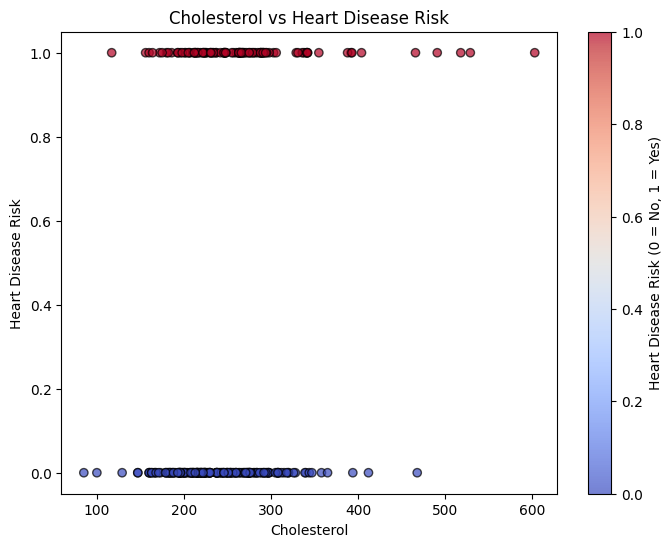

In [19]:
# Plot a scatter plot to visualize the relationship between Cholesterol and Heart Disease Risk
plt.figure(figsize=(8,6))
plt.scatter(data['Cholesterol'], data['Heart_Disease_Risk'], c=data['Heart_Disease_Risk'], cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('Cholesterol vs Heart Disease Risk')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Disease Risk')
plt.colorbar(label='Heart Disease Risk (0 = No, 1 = Yes)')
plt.show()

C:\Users\josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 2 features as input.

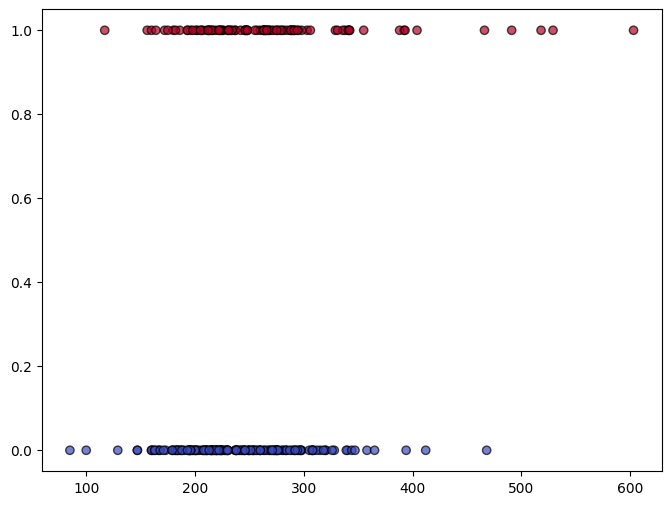

In [20]:
# Plot the regression line
plt.figure(figsize=(8,6))
plt.scatter(data['Cholesterol'], data['Heart_Disease_Risk'], c=data['Heart_Disease_Risk'], cmap='coolwarm', edgecolors='k', alpha=0.7)
x_vals = np.linspace(data['Cholesterol'].min(), data['Cholesterol'].max(), 100)
y_vals = log_reg.predict_proba(x_vals.reshape(-1, 1))[:, 1]  
plt.plot(x_vals, y_vals, color='red', label='Logistic Regression')
plt.title('Cholesterol Vs Angiographic heart disease risk (Logistic Regression)')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Disease Risk Probability')
plt.colorbar(label='Angiographic heart disease status (0 = No, 1 = Yes)')
plt.legend()
plt.show()

